## Biased sampling

In this tutorial we present Python code that recreates the visualizations in the [Interactive Sampling Distribution Demo](https://www.coursera.org/learn/understanding-visualization-data/lecture/i1PIX/demo-interactive-sampling-distribution). This demo looks at a hypothetical situation that illustrates what happens when we sample from a population in a biased manner.  In effect, we are sampling from a population that is different from the population in which we are interested. This tutorial assumes that you have viewed that video, and understand the statistical concepts that it covers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The (imaginary) data from the video are the body weights of UM students who either go to the gym or do not go to the gym.  Below we create a dataframe 'da' that is in "long form", with a row for each subject, and two columns -- one column for the body weight and one column containing an indicator for whether a person goes to the gym. 

In [2]:
# Parameters to recreate the simulations from the video 
mean_nogym = 155
sd_nogym = 5
mean_gym = 185 
sd_gym = 5 
gymperc = .3
popSize = 40000

# Create the two subpopulations
nogym = np.random.normal(mean_nogym, sd_nogym, int(popSize * (1 - gymperc)))
gym = np.random.normal(mean_gym, sd_gym, int(popSize * (gymperc)))

# Create the total population from the subpopulations
all_students = np.concatenate((nogym, gym))
gym_01 = np.concatenate((np.zeros(len(nogym)), np.ones(len(gym))))
da = pd.DataFrame({"weight": all_students, "gym": gym_01})

First, imagine that we consider only students who do not go to the gym.  This subpopulation appears as follows:

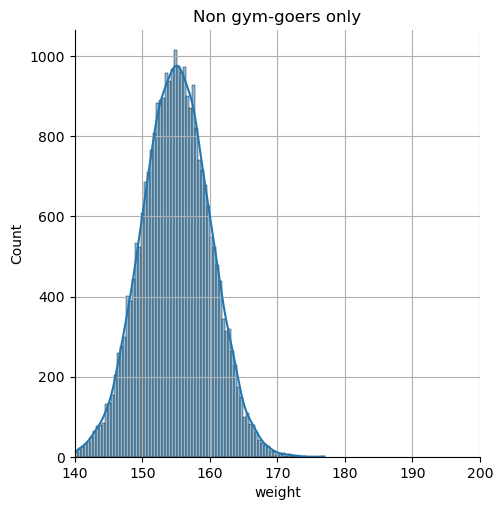

In [3]:
sns.displot(da[da["gym"] == 0], x="weight", kde=True)
plt.title("Non gym-goers only")
plt.grid(True)
plt.xlim([140, 200]);

If we instead only consider people who do go to the gym, the subpopulation is as follows:

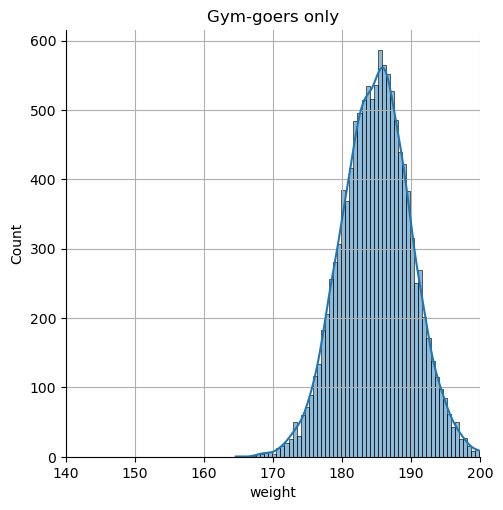

In [4]:
sns.displot(da[da["gym"] == 1], x="weight", kde=True)
plt.title("Gym-goers only")
plt.grid(True)
plt.xlim([140, 200]);

The overall population is shown below.  Since we have the entire population in-hand, the mean that we calculate here (shown as a red vertical line) is the population mean.

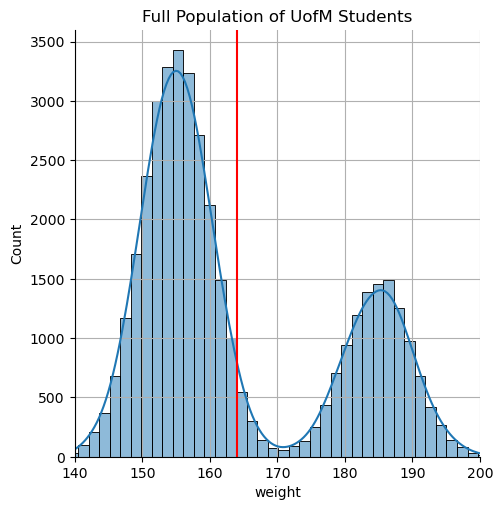

In [5]:
sns.displot(da, x="weight", kde=True)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(da["weight"]), color="red")
plt.grid(True)
plt.xlim([140, 200]);

## What happens if we sample from the entire population?

Here we sample randomly from all students at the University of Michigan.  Each sample is a small (e.g. 50, based on the 'sampSize' variable below) simple random sample (SRS) from the total population.  We calculate the sample mean of each sample for further investigation below.

In [6]:
# Simulation parameters
numberSamps = 5000
sampSize = 50

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    student_sample = np.random.choice(da["weight"], sampSize)
    mean_distribution[i] = np.mean(student_sample)

Below we plot the distribution of sample means.  As expected, the distribution of sample means appears somewhat normal, and is much more concentrated than the distribution of the data (shown above).  The larger the sampl esize ('sampSize' above), the more concentrated this "sampling distribution" will be.  Moreover, we see that the sampling distribution is centered around the population mean.

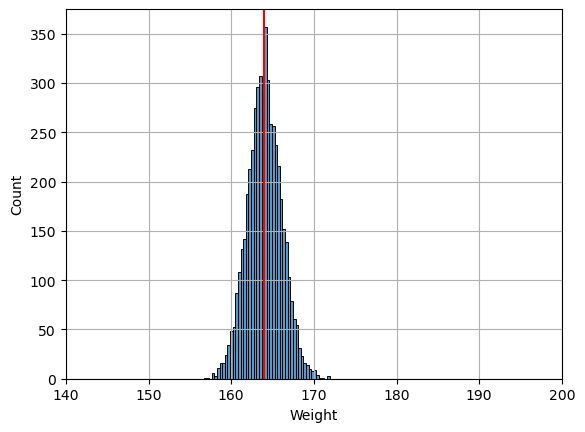

In [7]:
sns.histplot(mean_distribution)
plt.axvline(x = np.mean(da["weight"]), color="red")
plt.grid(True)
plt.xlabel("Weight")
plt.xlim([140, 200]);

## What happens if we take a non-representative sample?

What happens if we recruit individuals to our study by considering only students who are walking out of the gym?

In [8]:
# Simulation parameters
numberSamps = 5000
sampSize = 50

# Get the sampling distribution of the mean from only the gym
biased_mean_distribution = np.empty(numberSamps)
db = da[da["gym"] == 1]
for i in range(numberSamps):
    student_sample = np.random.choice(db["weight"], sampSize)
    biased_mean_distribution[i] = np.mean(student_sample) 

The distribution of these sample means is concentrated around the mean of gym-goers (blue line), but is strongly positively biased relative to the mean of the population (red line).

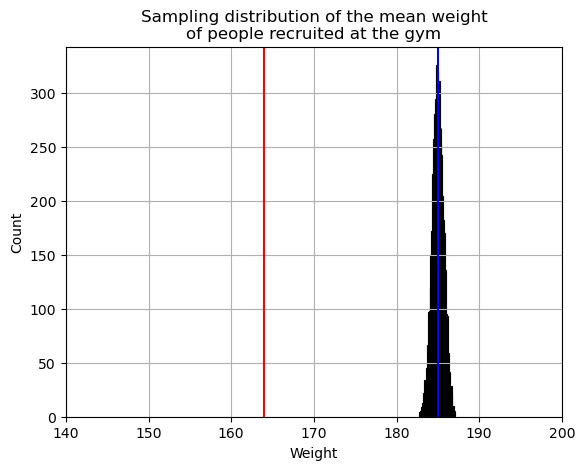

In [9]:
sns.histplot(biased_mean_distribution)
plt.title("Sampling distribution of the mean weight\nof people recruited at the gym")
plt.axvline(x = np.mean(da["weight"]), color="red")
plt.axvline(x = np.mean(biased_mean_distribution), color="blue")
plt.grid(True)
plt.xlabel("Weight")
plt.xlim([140, 200]);